In [85]:
#importing dataframe related dataframes
import pandas as pd
import numpy as np

#importing plot related libraires
import seaborn as sns
import matplotlib.pyplot as plt

#to remove warnings
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [87]:
# from google.colab import drive
# drive.mount('/content/drive')

In [89]:
null_values=['NA',np.nan,'?',',','.',' ']     # listing null values

#reading all files
df1=pd.read_csv("Insurance_Claim_Info_data.csv",na_values=null_values)
df2=pd.read_csv("Insurance_Date_data.csv",na_values=null_values)
df3=pd.read_csv("Insurance_Result_data.csv",na_values=null_values)
test=pd.read_excel("test_data-1663477366404.xlsx",na_values=null_values)
sub=pd.read_csv("sample_submission-1663477392772.csv")

In [91]:
df1

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools
...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors


In [93]:
#merging all train files on basis of Claim Number
main=df1.merge(df2,on="Claim Number",how="left").merge(df3,on="Claim Number",how="left")
main

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,25-05-2007,06-07-2007,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,17-09-2006,27-09-2006,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,12-06-2006,17-07-2006,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,13-11-2005,05-12-2005,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,28-07-2008,12-08-2008,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,19-12-2005,21-03-2006,238.00,115.60,Settle
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,08-01-2007,16-01-2007,7.00,0.00,Deny
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,19-09-2005,18-10-2005,166.00,70.00,Settle
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,14-04-2009,09-09-2009,450.00,280.00,Settle


In [95]:
#train data shape
main.shape

(34110, 12)

In [97]:
# formatting the dates into datetime 
main['Incident Date']=pd.to_datetime(main['Incident Date'])
main['Date Received']=pd.to_datetime(main['Date Received'])
main.dtypes

Claim Number               object
City Code                  object
City                       object
Enterprise Type            object
Claim Type                 object
Claim Site                 object
Product Insured            object
Incident Date      datetime64[ns]
Date Received      datetime64[ns]
Claim Amount              float64
Close Amount              float64
Disposition                object
dtype: object

In [99]:
test['Incident Date']=pd.to_datetime(test['Incident Date'])
test['Date Received']=pd.to_datetime(test['Date Received'])
test.dtypes

Claim Number               object
Incident Date      datetime64[ns]
Date Received      datetime64[ns]
City Code                  object
City                       object
Enterprise Type            object
Claim Type                 object
Claim Site                 object
Product Insured            object
dtype: object

In [101]:
main["Incident Date"].min(),main["Incident Date"].max()

(Timestamp('2002-01-07 00:00:00'), Timestamp('2010-06-22 00:00:00'))

In [103]:
main["Date Received"].min(),main["Date Received"].max()

(Timestamp('1994-05-01 00:00:00'), Timestamp('2055-05-17 00:00:00'))

In [105]:
test["Incident Date"].min(),test["Incident Date"].max()

(Timestamp('2002-01-12 00:00:00'), Timestamp('2009-12-25 00:00:00'))

In [107]:
test["Date Received"].min(),test["Date Received"].max()

(Timestamp('2002-03-12 00:00:00'), Timestamp('2009-12-30 00:00:00'))

In [109]:
#extracting records from 2002 to 2009
main_df=main[(main['Date Received'] > '2002-01-01') & (main['Date Received'] < '2009-12-31')]
main_df.shape

(34103, 12)

In [111]:
test.shape

(3791, 9)

In [112]:
#for id extraction
test_data=test.copy()

In [113]:
main_df["delaying period"]=main_df["Date Received"]-main_df["Incident Date"]
main_df

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,delaying period
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,13 days
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10 days
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-12-06,2006-07-17,83.98,83.98,Approve in Full,-142 days
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny,-185 days
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2005-12-19,2006-03-21,238.00,115.60,Settle,92 days
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,2007-08-01,2007-01-16,7.00,0.00,Deny,-197 days
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2005-09-19,2005-10-18,166.00,70.00,Settle,29 days
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,2009-04-14,2009-09-09,450.00,280.00,Settle,148 days


In [114]:
test_data["delaying period"]=test_data["Date Received"]-test_data["Incident Date"]

In [115]:
#copying train file for the sake of finding instances
train_ins=main_df.copy()

In [116]:
#for model usage
train_data=main_df.copy()

In [117]:
#finding the null values
train_data.isnull().sum()

Claim Number       0
City Code          0
City               0
Enterprise Type    0
Claim Type         0
Claim Site         0
Product Insured    0
Incident Date      0
Date Received      0
Claim Amount       0
Close Amount       0
Disposition        0
delaying period    0
dtype: int64

In [118]:
train_data.describe(include='all')

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,delaying period
count,34103,34103,34103,34103,34103,34103,34103,34103,34103,34103.000000,34103.000000,34103,34103
unique,34103,23,23,13,2,3,13,2685,1828,NaN,NaN,3,NaN
top,DQW1NZO0PL,BOM,Mumbai,Sole Proprietorship,Property Loss,In Transit,Inventory - Raw Material,2004-04-19 00:00:00,2004-04-21 00:00:00,NaN,NaN,Deny,NaN
freq,1,2562,2562,6257,21213,28800,8108,38,215,NaN,NaN,17846,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-01-07 00:00:00,2002-01-11 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-06-22 00:00:00,2009-12-30 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,717.939298,104.875357,NaN,40 days 02:11:41.991027182
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8291.728032,1393.701799,NaN,140 days 19:29:44.941067294
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,-1439 days +00:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,0.000000,NaN,-14 days +00:00:00


In [119]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34103 entries, 0 to 34109
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Claim Number     34103 non-null  object         
 1   City Code        34103 non-null  object         
 2   City             34103 non-null  object         
 3   Enterprise Type  34103 non-null  object         
 4   Claim Type       34103 non-null  object         
 5   Claim Site       34103 non-null  object         
 6   Product Insured  34103 non-null  object         
 7   Incident Date    34103 non-null  datetime64[ns] 
 8   Date Received    34103 non-null  datetime64[ns] 
 9   Claim Amount     34103 non-null  float64        
 10  Close Amount     34103 non-null  float64        
 11  Disposition      34103 non-null  object         
 12  delaying period  34103 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), object(8), timedelta64[ns](1)
memory usage

## To find the average % of claims received when the claim is 'Settled' 

In [120]:
in1=train_data.groupby(['Disposition','Claim Type']).size().reset_index().rename(columns={0:'size'})
in1

,Disposition,Claim Type,size
0,Approve in Full,Property Damage,3831
1,Approve in Full,Property Loss,5219
2,Deny,Property Damage,6149
3,Deny,Property Loss,11697
4,Settle,Property Damage,2910
5,Settle,Property Loss,4297


In [121]:
insight1=in1.groupby(by='Disposition',axis=0).sum().reset_index() #using groupby attribute 
insight1.head()

,Disposition,size
0,Approve in Full,9050
1,Deny,17846
2,Settle,7207


In [122]:
insight1['size']=insight1['size']/sum(insight1['size'])  # to get the average percentage

In [123]:
insight1.head()

,Disposition,size
0,Approve in Full,0.265373
1,Deny,0.523297
2,Settle,0.211330


<AxesSubplot: xlabel='Disposition', ylabel='size'>

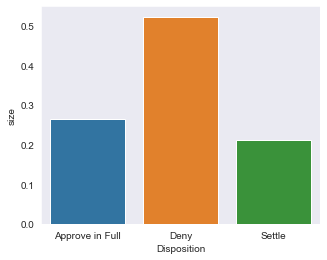

In [124]:
#plotting the sizes of Disposition using barpolot
plt.figure(figsize=(5,4))
sns.barplot(insight1['Disposition'],insight1['size'])


# To find Which 'Product' has the highest delay in Reporting (In days)

In [125]:
train_ins.dtypes

Claim Number                object
City Code                   object
City                        object
Enterprise Type             object
Claim Type                  object
Claim Site                  object
Product Insured             object
Incident Date       datetime64[ns]
Date Received       datetime64[ns]
Claim Amount               float64
Close Amount               float64
Disposition                 object
delaying period    timedelta64[ns]
dtype: object

In [126]:
train_ins['delaying period'] = train_ins['delaying period'].dt.days.astype('int16')

In [127]:
train_data['delaying period'] = train_data['delaying period'].dt.days.astype('int16')

In [128]:
train_data['delaying period'] = train_data['delaying period'].abs()

In [129]:
test_data['delaying period'] = test_data['delaying period'].dt.days.astype('int16')

In [130]:
test_data['delaying period'] = test_data['delaying period'].abs()

In [131]:
in2=train_ins.groupby(['Product Insured','delaying period']).size()
insight3=in2.groupby(by='Product Insured',axis=0).sum().reset_index() #using groupby attribute 
insight3

,Product Insured,0
0,Cameras and other Misc. Security Equipment,343
1,Fixtures,1065
2,Furniture,3033
3,"Heating, ventilation, and air conditioning (HV...",2787
4,Inventory - Finished Goods,3322
5,Inventory - Raw Material,8108
6,Misc. Electrical Equipment,2945
7,Misc. Electronic Items,5608
8,Misc. Engineering Tools,4246
9,Misc. Lab Equipment,695


In [132]:
train_ins['Product Insured'].value_counts()

Inventory - Raw Material                                    8108
Misc. Electronic Items                                      5608
Misc. Engineering Tools                                     4246
Inventory - Finished Goods                                  3322
Furniture                                                   3033
Misc. Electrical Equipment                                  2945
Heating, ventilation, and air conditioning (HVAC) System    2787
Fixtures                                                    1065
Pumps and Motors                                            1025
Misc. Lab Equipment                                          695
Misc. Sensors                                                579
Property, Plant, and Equipment (PPE) Parts                   347
Cameras and other Misc. Security Equipment                   343
Name: Product Insured, dtype: int64

<AxesSubplot: xlabel='Product Insured', ylabel='delaying period'>

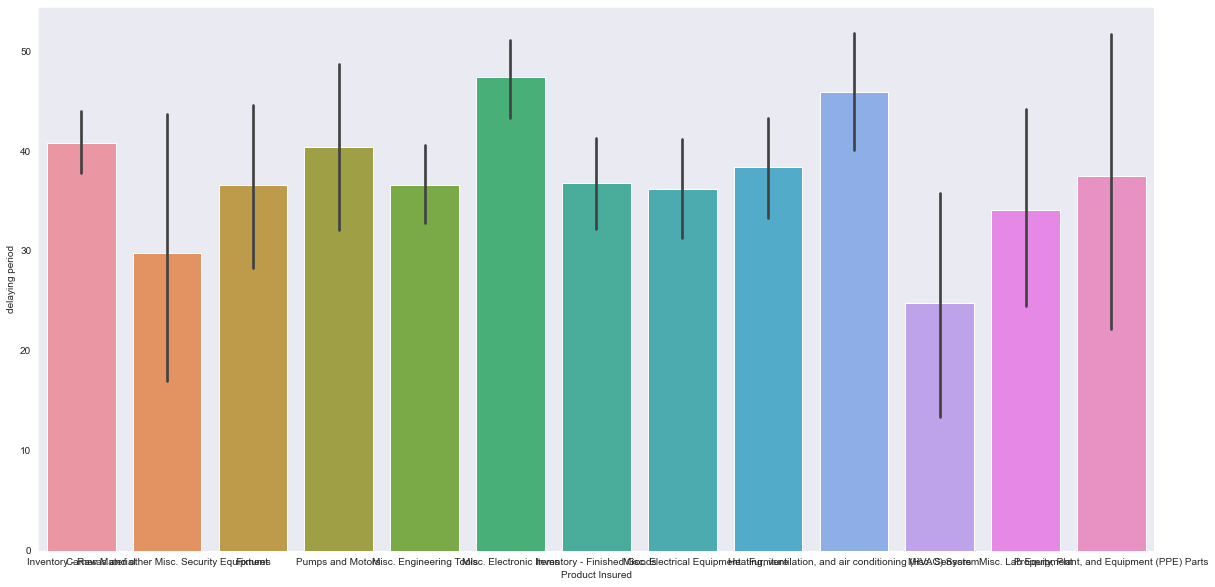

In [133]:
#plotting how the reporting delay for different for Product Insured
plt.figure(figsize=(20,10))
sns.barplot(train_ins['Product Insured'],train_ins['delaying period'])

# #number of claim types and its count

<AxesSubplot: title={'center': 'no of claim types'}, xlabel='Claim Type', ylabel='count'>

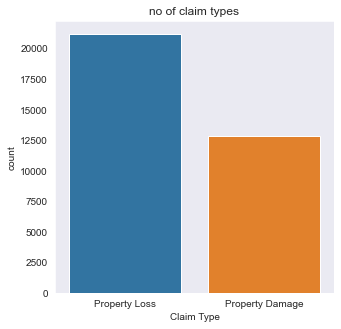

In [134]:
#plotting for number of different Claim types
plt.figure(figsize=(5,5))
plt.title('no of claim types')
sns.countplot(train_ins['Claim Type'])

# finding which city has more number of incidents

<AxesSubplot: title={'center': 'no of incidents in each city'}, xlabel='City', ylabel='count'>

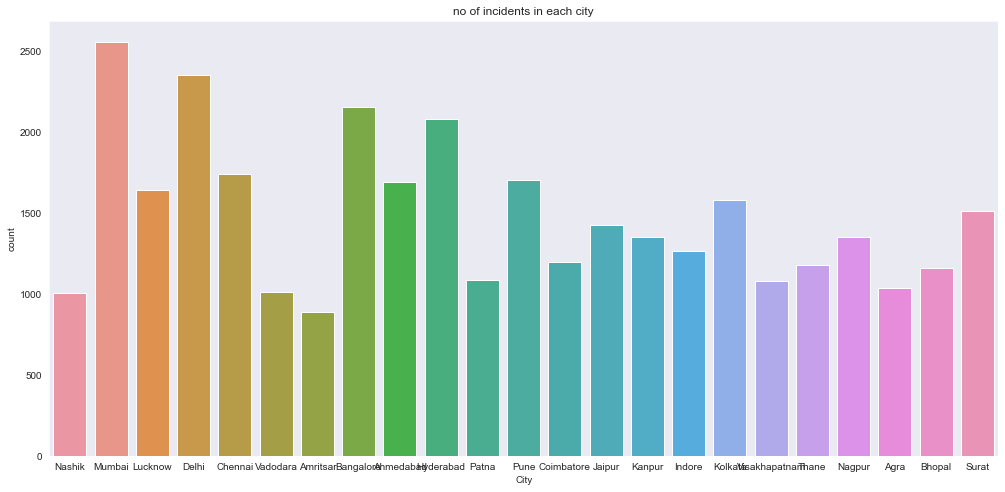

In [135]:
# plot for cities having number of incidents and finding out the city which is having highest number of incidents
plt.figure(figsize=(17,8))
plt.title('no of incidents in each city')
sns.countplot(train_ins['City'])

<AxesSubplot: title={'center': 'scatter plot'}, xlabel='Close Amount', ylabel='Claim Amount'>

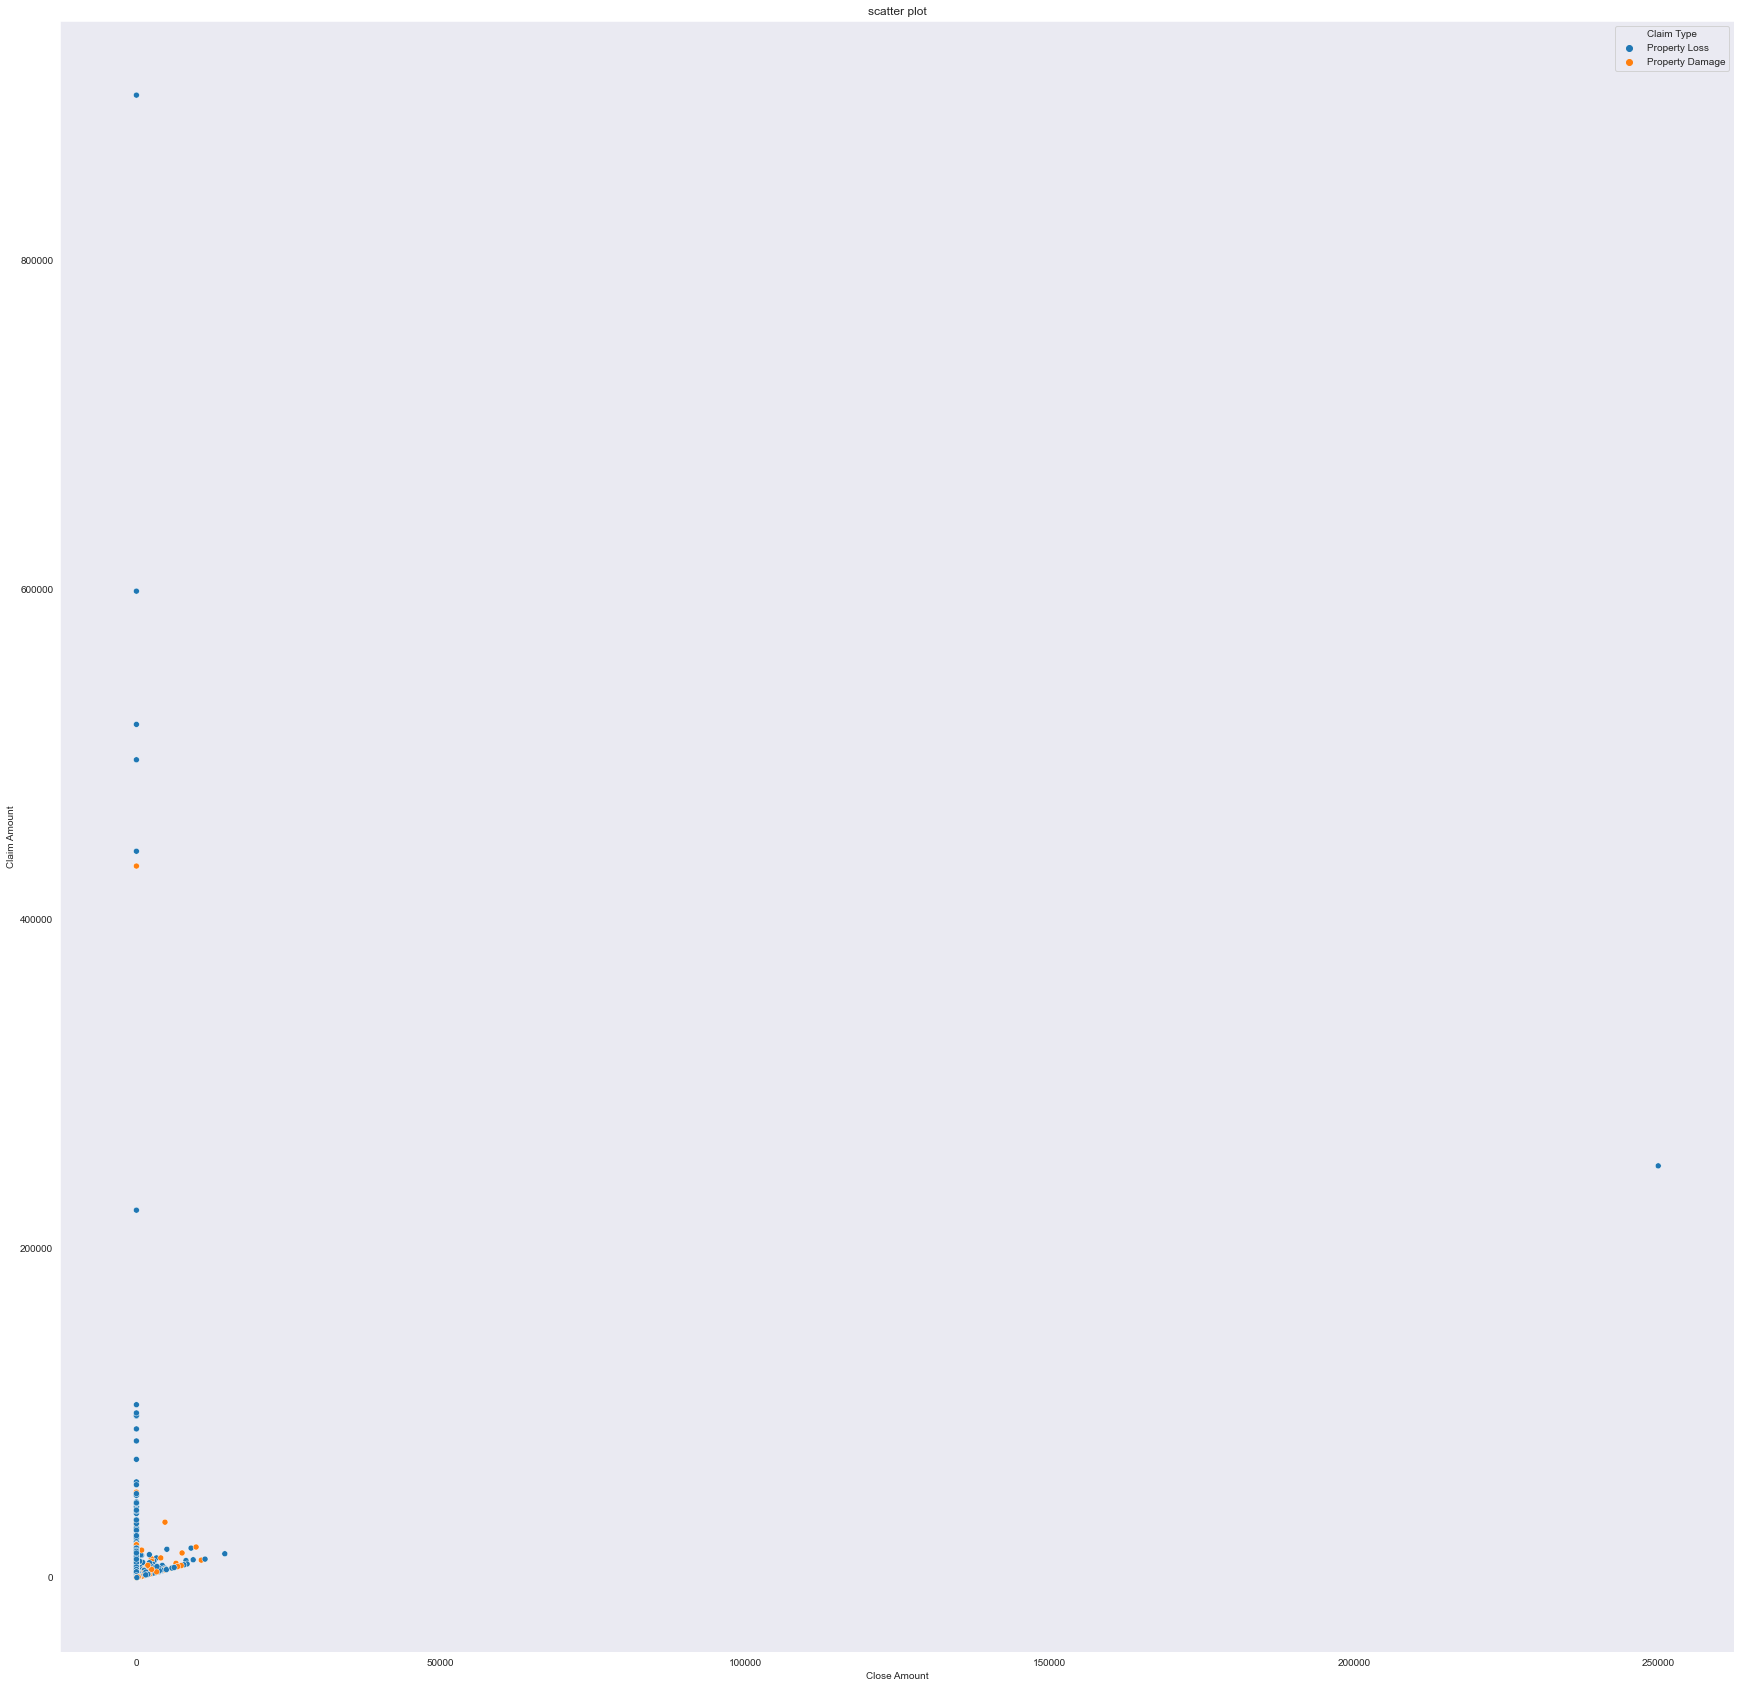

In [136]:
#plot for how claim type and claim amount varies 
#from this plot the property loss 
plt.figure(figsize=(30,30))
plt.title('scatter plot')
sns.scatterplot('Close Amount','Claim Amount',hue='Claim Type',data=train_ins)

In [137]:
train_ins['Product Insured'].value_counts()

Inventory - Raw Material                                    8108
Misc. Electronic Items                                      5608
Misc. Engineering Tools                                     4246
Inventory - Finished Goods                                  3322
Furniture                                                   3033
Misc. Electrical Equipment                                  2945
Heating, ventilation, and air conditioning (HVAC) System    2787
Fixtures                                                    1065
Pumps and Motors                                            1025
Misc. Lab Equipment                                          695
Misc. Sensors                                                579
Property, Plant, and Equipment (PPE) Parts                   347
Cameras and other Misc. Security Equipment                   343
Name: Product Insured, dtype: int64

<AxesSubplot: xlabel='Product Insured', ylabel='Close Amount'>

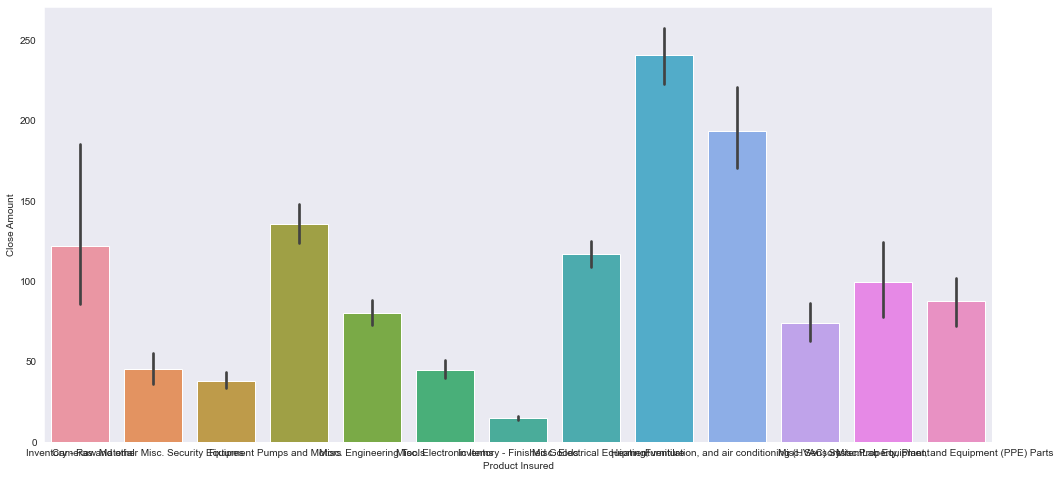

In [138]:
#people Report Products with more value earlier compared to Products with less value
plt.figure(figsize=(17,8))
sns.barplot(train_ins['Product Insured'],train_ins['Close Amount'])

In [139]:
#assigning numerical data feature sinto list
nume=['Claim Amount','Close Amount','delaying period']

In [140]:
#again i created copied data from train_data for the sake of boxplot 
train_new=train_data.copy()

In [141]:
#creating new dataframe removing outliers in both claim amount and close amount
for col in nume:
    train_new[col].sort_values()
    q1=train_new[col].quantile(0.25)
    q3=train_new[col].quantile(0.75)
    IQR=q3-q1
    upper_whisker=q3+(1.5*IQR)
    lower_whisker=q1-(1.5*IQR)
    #train_new[col]=np.where(train_new[col]>upper_whisker,upper_whisker,np.where(train_new[col]<lower_whisker,lower_whisker,train_new[col]))
    #train_new.drop([train_new[col]],axis=1)
    index = train_new[ (train_new[col] > upper_whisker) | (train_new[col] < lower_whisker)].index
    train_new.drop(index,inplace=True)
train_new.shape

(25980, 13)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


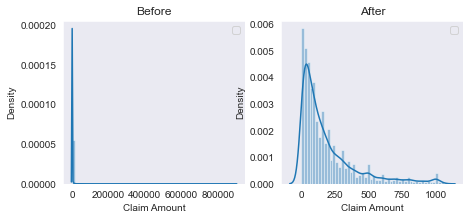

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


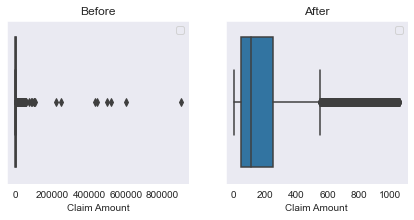

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

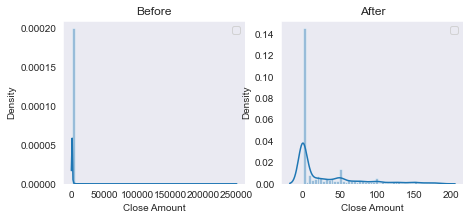

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


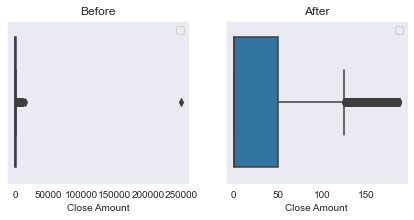

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

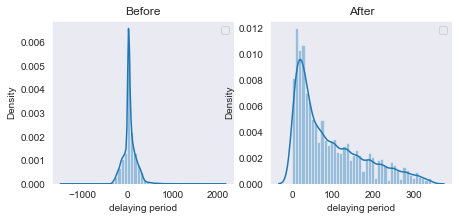

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


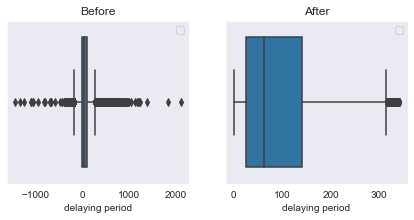

<Figure size 432x288 with 0 Axes>

In [142]:

#plots for before and after removinng outliers
sns.set_style('dark')
for col in train_ins[nume]:
    plt.figure(figsize=(15,3))
    
    plt.subplot(141)
    sns.distplot(train_ins[col])
    plt.title("Before")
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(train_new[col])
    plt.title("After")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(15,3))
    plt.subplot(143)
    sns.boxplot(train_ins[col])
    plt.title("Before")
    plt.legend(labels=None)
    
    plt.subplot(144)
    sns.boxplot(train_new[col])
    plt.title("After")
    plt.legend()
    plt.show()
    plt.tight_layout()

In [143]:
# I did not remove outliers

#  For model

In [144]:
#finding the null vaues in train data
train_data.isnull().sum()

Claim Number       0
City Code          0
City               0
Enterprise Type    0
Claim Type         0
Claim Site         0
Product Insured    0
Incident Date      0
Date Received      0
Claim Amount       0
Close Amount       0
Disposition        0
delaying period    0
dtype: int64

In [145]:
#finding the null vaues in test data
test_data.isnull().sum()

Claim Number       0
Incident Date      0
Date Received      0
City Code          0
City               0
Enterprise Type    0
Claim Type         0
Claim Site         0
Product Insured    0
delaying period    0
dtype: int64

In [146]:
#test data copied for the sake of submssion file to take id
test_id=test_data.copy()

In [147]:
train_data.describe(include='all')

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,delaying period
count,34103,34103,34103,34103,34103,34103,34103,34103,34103,34103.000000,34103.000000,34103,34103.000000
unique,34103,23,23,13,2,3,13,2685,1828,NaN,NaN,3,NaN
top,DQW1NZO0PL,BOM,Mumbai,Sole Proprietorship,Property Loss,In Transit,Inventory - Raw Material,2004-04-19 00:00:00,2004-04-21 00:00:00,NaN,NaN,Deny,NaN
freq,1,2562,2562,6257,21213,28800,8108,38,215,NaN,NaN,17846,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-01-07 00:00:00,2002-01-11 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-06-22 00:00:00,2009-12-30 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,717.939298,104.875357,NaN,101.890420
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8291.728032,1393.701799,NaN,105.135727
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,0.000000,NaN,26.000000


In [148]:
train_data.columns #columns of the train data

Index(['Claim Number', 'City Code', 'City', 'Enterprise Type', 'Claim Type',
       'Claim Site', 'Product Insured', 'Incident Date', 'Date Received',
       'Claim Amount', 'Close Amount', 'Disposition', 'delaying period'],
      dtype='object')

In [149]:
test_data.columns  #columns of the test data

Index(['Claim Number', 'Incident Date', 'Date Received', 'City Code', 'City',
       'Enterprise Type', 'Claim Type', 'Claim Site', 'Product Insured',
       'delaying period'],
      dtype='object')

In [150]:
#dropping the unnecessary columns in the train data
train_data.drop(['Claim Number','City','Incident Date','Date Received','Claim Amount','Close Amount'],axis=1,inplace=True)

In [151]:
train_data.columns

Index(['City Code', 'Enterprise Type', 'Claim Type', 'Claim Site',
       'Product Insured', 'Disposition', 'delaying period'],
      dtype='object')

In [152]:
#dropping the unnecessary columns in the test data
test_data.drop(['Claim Number','Incident Date','Date Received','City'],axis=1,inplace=True)

In [153]:
train_data.head()

,City Code,Enterprise Type,Claim Type,Claim Site,Product Insured,Disposition,delaying period
0,NSK,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,Deny,13
1,BOM,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,Settle,10
2,LKO,Public Limited Company,Property Loss,In Transit,Fixtures,Approve in Full,142
3,DEL,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,Deny,185
4,DEL,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,Settle,133


In [154]:
y=train_data[['Disposition']]
y['Disposition']=y['Disposition'].astype("category")
train_data.drop('Disposition',axis=1,inplace=True)
x=train_data

In [155]:
x.head()

,City Code,Enterprise Type,Claim Type,Claim Site,Product Insured,delaying period
0,NSK,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,13
1,BOM,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,10
2,LKO,Public Limited Company,Property Loss,In Transit,Fixtures,142
3,DEL,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,185
4,DEL,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,133


In [156]:
test_data.head()

,City Code,Enterprise Type,Claim Type,Claim Site,Product Insured,delaying period
0,PNQ,One Person Company,Property Loss,In Transit,Inventory - Finished Goods,96
1,PNQ,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures,291
2,AMD,Private Limited Company,Property Loss,Warehouse,Inventory - Raw Material,220
3,DEL,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,40
4,PNQ,Private Limited Company,Property Damage,In Transit,Misc. Electronic Items,72


In [157]:
cat_cols=[cols for cols in train_data.columns if cols!='delaying period']

In [158]:
num_cols=['delaying period']

In [159]:
#splitting the train data into train and validation data using stratify to remove the immbalance
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123,stratify=y)

In [160]:
x_train

,City Code,Enterprise Type,Claim Type,Claim Site,Product Insured,delaying period
27577,JAI,Partnership Firm,Property Loss,In Transit,Misc. Engineering Tools,20
33332,MAA,Public Limited Company,Property Loss,In Transit,Pumps and Motors,2
6960,IDR,Foreign Subsidary,Property Loss,Warehouse,"Heating, ventilation, and air conditioning (HV...",170
28785,AGR,Private Ltd. MSME - Micro,Property Loss,In Transit,Misc. Engineering Tools,107
17578,HYD,One Person Company,Property Damage,In Transit,Misc. Electronic Items,283
...,...,...,...,...,...,...
28374,MAA,Sole Proprietorship,Property Loss,In Transit,Inventory - Finished Goods,226
21416,STV,Non-Profit Organization (NPO),Property Damage,In Transit,Misc. Electrical Equipment,77
7182,IDR,Joint-Venture Company,Property Loss,In Transit,Inventory - Raw Material,31
28074,PNQ,One Person Company,Property Damage,In Transit,Misc. Electronic Items,1


# OneHotEncoding

In [161]:
#using OneHotEncoder for categorical data 
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown="ignore")   # ignore used to remove the classes in test featrure which are not in train feature
#fitting on the train data
ohe.fit(x_train[cat_cols])

OneHotEncoder(handle_unknown='ignore')

In [162]:
#list out the columns names
cols=list(ohe.get_feature_names(cat_cols))

In [163]:
#transform onto the train data
x_train_cat=pd.DataFrame(ohe.transform(x_train[cat_cols]).todense(),columns=cols)
x_train_cat

,City Code_AGR,City Code_AMD,City Code_ATQ,City Code_BDQ,City Code_BHO,City Code_BLR,City Code_BOM,City Code_CCU,City Code_CJB,City Code_DEL,...,"Product Insured_Heating, ventilation, and air conditioning (HVAC) System",Product Insured_Inventory - Finished Goods,Product Insured_Inventory - Raw Material,Product Insured_Misc. Electrical Equipment,Product Insured_Misc. Electronic Items,Product Insured_Misc. Engineering Tools,Product Insured_Misc. Lab Equipment,Product Insured_Misc. Sensors,"Product Insured_Property, Plant, and Equipment (PPE) Parts",Product Insured_Pumps and Motors
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [164]:
#transform onto the validation data
x_test_cat=pd.DataFrame(ohe.transform(x_test[cat_cols]).todense(),columns=cols)

In [165]:
#transform onto the test(unseen) data
test_cat=pd.DataFrame(ohe.transform(test_data[cat_cols]).todense(),columns=cols)

In [166]:
x_tr=pd.concat([x_train_cat,x_train[num_cols].reset_index()],axis=1)
x_tr=x_tr.drop("index",axis=1)
x_tr

,City Code_AGR,City Code_AMD,City Code_ATQ,City Code_BDQ,City Code_BHO,City Code_BLR,City Code_BOM,City Code_CCU,City Code_CJB,City Code_DEL,...,Product Insured_Inventory - Finished Goods,Product Insured_Inventory - Raw Material,Product Insured_Misc. Electrical Equipment,Product Insured_Misc. Electronic Items,Product Insured_Misc. Engineering Tools,Product Insured_Misc. Lab Equipment,Product Insured_Misc. Sensors,"Product Insured_Property, Plant, and Equipment (PPE) Parts",Product Insured_Pumps and Motors,delaying period
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,107
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,226
27278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77
27279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31
27280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [167]:
x_te=pd.concat([x_test_cat,x_test[num_cols].reset_index()],axis=1)
x_te=x_te.drop("index",axis=1)

In [168]:
test=pd.concat([test_cat,test_data[num_cols]],axis=1)

In [169]:
y_train

,Disposition
27577,Deny
33332,Deny
6960,Deny
28785,Approve in Full
17578,Deny
...,...
28374,Approve in Full
21416,Settle
7182,Approve in Full
28074,Settle


# LabelEncoder

In [170]:
#applying label encoder for the cateogrical data in target
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#fit on the y_train
le.fit(y_train)

LabelEncoder()

In [171]:
#transform on to the train 
y_train['Disposition']=le.transform(y_train['Disposition'])
y_train

,Disposition
27577,1
33332,1
6960,1
28785,0
17578,1
...,...
28374,0
21416,2
7182,0
28074,2


In [172]:
#transform on to the validation
y_test['Disposition']=le.transform(y_test['Disposition'])

# Logistic Regression

In [173]:
from sklearn.metrics import classification_report as cr,confusion_matrix

In [174]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_tr,y_train)

LogisticRegression()

In [175]:
train_predlr=lr.predict(x_tr)
test_predlr=lr.predict(x_te)

In [176]:
print('---confusion_matrix on train-----')
print(confusion_matrix(train_predlr,y_train))
print('---confusion_matrix on validation----')
print(confusion_matrix(test_predlr,y_test))

---confusion_matrix on train-----
[[ 1520  1602   464]
 [ 5719 12673  5299]
 [    1     2     2]]
---confusion_matrix on validation----
[[ 382  391  122]
 [1427 3178 1320]
 [   1    0    0]]


In [177]:
print("--------train data---------")
print(cr(train_predlr,y_train))
print("--------validation data---------")
print(cr(y_test,test_predlr))

--------train data---------
              precision    recall  f1-score   support

           0       0.21      0.42      0.28      3586
           1       0.89      0.53      0.67     23691
           2       0.00      0.40      0.00         5

    accuracy                           0.52     27282
   macro avg       0.37      0.45      0.32     27282
weighted avg       0.80      0.52      0.62     27282

--------validation data---------
              precision    recall  f1-score   support

           0       0.43      0.21      0.28      1810
           1       0.54      0.89      0.67      3569
           2       0.00      0.00      0.00      1442

    accuracy                           0.52      6821
   macro avg       0.32      0.37      0.32      6821
weighted avg       0.39      0.52      0.43      6821



# Decission Tree

In [178]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_tr,y_train)

DecisionTreeClassifier()

In [179]:
train_predsdtc=dtc.predict(x_tr)
test_predsdtc=dtc.predict(x_te)

In [180]:
print('---confusion_matrix on train-----')
print(confusion_matrix(train_predsdtc,y_train))
print('---confusion_matrix on validation----')
print(confusion_matrix(test_predsdtc,y_test))

---confusion_matrix on train-----
[[ 7192   374   201]
 [   38 13877   398]
 [   10    26  5166]]
---confusion_matrix on validation----
[[ 606  872  356]
 [ 845 2017  760]
 [ 359  680  326]]


In [181]:
from sklearn.metrics import classification_report as cr
print("--------train data---------")
print(cr(y_train,train_predsdtc))
print("--------validation data---------")
print(cr(y_test,test_predsdtc))

--------train data---------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7240
           1       0.97      0.97      0.97     14277
           2       0.99      0.90      0.94      5765

    accuracy                           0.96     27282
   macro avg       0.96      0.95      0.96     27282
weighted avg       0.96      0.96      0.96     27282

--------validation data---------
              precision    recall  f1-score   support

           0       0.33      0.33      0.33      1810
           1       0.56      0.57      0.56      3569
           2       0.24      0.23      0.23      1442

    accuracy                           0.43      6821
   macro avg       0.38      0.38      0.38      6821
weighted avg       0.43      0.43      0.43      6821



In [182]:
#prediction on the test data
final_predsdt=dtc.predict(test)

In [183]:
#creating dataframe on test predictions
col=['Disposition']
final_preddtc=pd.DataFrame(final_predsdt,columns=col)

In [184]:
# inversing the labeled one into actual names using transform of label encoder
final_preddtc['Disposition']=le.inverse_transform(final_preddtc['Disposition'])

In [185]:
test_predsdtc

array([1, 0, 2, ..., 1, 0, 0])

In [186]:
final_preddtc

,Disposition
0,Approve in Full
1,Deny
2,Approve in Full
3,Deny
4,Deny
...,...
3786,Deny
3787,Approve in Full
3788,Settle
3789,Deny


In [187]:
#concating both test id and prediction of test dat
submitdt=pd.concat([test_id['Claim Number'],final_preddtc],axis=1)
submitdt

,Claim Number,Disposition
0,6EYB31JGFR,Approve in Full
1,HJLRXONE3R,Deny
2,IUOV99JA22,Approve in Full
3,BGOUHQ2LKK,Deny
4,HDCG60QET1,Deny
...,...,...
3786,IMQYY73AOP,Deny
3787,2AR1OGIMH4,Approve in Full
3788,SB4IET2MO5,Settle
3789,3IBWXQK04L,Deny


# DecisionTree with GridSearchCV

In [188]:
from sklearn.model_selection import GridSearchCV #importing the GridSearchcv

In [189]:
paramsdt={'criterion':['gini','entropy','log_loss'],'max_depth':[5,10,30,50]}   #giving set of parameters to get the best

In [190]:
dtc_grid=GridSearchCV(estimator=dtc,param_grid=paramsdt,verbose=1)

In [191]:
#apply on train data
dtc_grid.fit(x_tr,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 30, 50]},
             verbose=1)

In [192]:
train_predsdtgsv=dtc_grid.predict(x_tr)
test_predsdtgsv=dtc_grid.predict(x_te)

In [193]:
from sklearn.metrics import classification_report as cr
print("--------train data---------")
print(cr(y_train,train_predsdtgsv))
print("--------validation data---------")
print(cr(y_test,test_predsdtgsv))

--------train data---------
              precision    recall  f1-score   support

           0       0.56      0.24      0.34      7240
           1       0.55      0.93      0.69     14277
           2       1.00      0.00      0.00      5765

    accuracy                           0.55     27282
   macro avg       0.70      0.39      0.34     27282
weighted avg       0.65      0.55      0.45     27282

--------validation data---------
              precision    recall  f1-score   support

           0       0.54      0.24      0.33      1810
           1       0.55      0.92      0.69      3569
           2       0.00      0.00      0.00      1442

    accuracy                           0.55      6821
   macro avg       0.36      0.39      0.34      6821
weighted avg       0.43      0.55      0.45      6821



In [194]:
final_predsdtgsv=dtc.predict(test)

In [195]:
#creating dataframe on test predictions
col=['Disposition']
final_preddtcgsv=pd.DataFrame(final_predsdtgsv,columns=col)

In [196]:
# inversing the labeled one into actual names using transform of label encoder
final_preddtcgsv['Disposition']=le.inverse_transform(final_preddtcgsv['Disposition'])

In [197]:
#concating both test id and prediction of test dat
submitdtgsv=pd.concat([test_id['Claim Number'],final_preddtcgsv],axis=1)

# Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier
rtc=RandomForestClassifier()
rtc.fit(x_tr,y_train)

RandomForestClassifier()

In [199]:
train_predsrf=rtc.predict(x_tr)
test_predsrf=rtc.predict(x_te)

In [200]:
from sklearn.metrics import classification_report as cr
print("--------train data---------")
print(cr(y_train,train_predsrf))
print("--------validation data---------")
print(cr(y_test,test_predsrf))

--------train data---------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7240
           1       0.96      0.98      0.97     14277
           2       0.96      0.93      0.94      5765

    accuracy                           0.96     27282
   macro avg       0.96      0.95      0.96     27282
weighted avg       0.96      0.96      0.96     27282

--------validation data---------
              precision    recall  f1-score   support

           0       0.36      0.35      0.36      1810
           1       0.57      0.61      0.59      3569
           2       0.26      0.22      0.24      1442

    accuracy                           0.46      6821
   macro avg       0.40      0.40      0.40      6821
weighted avg       0.45      0.46      0.45      6821



In [201]:
final_predsrtc=rtc.predict(test)

In [202]:
col=['Disposition']
final_predrtc=pd.DataFrame(final_predsrtc,columns=col)

In [203]:
final_predrtc['Disposition']=le.inverse_transform(final_predrtc['Disposition'])

In [204]:
submitrtf=pd.concat([test_id['Claim Number'],final_predrtc],axis=1)

# Random Forest With gridsearchCV

In [206]:
params={'n_estimators':[100,150,200],
    'criterion':['gini','entropy'],
    'max_depth':[5,7,10,30,50]}

In [207]:
rfc_grid=GridSearchCV(estimator=rtc,param_grid=params,verbose=1)

In [208]:
rfc_grid.fit(x_tr,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 30, 50],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [209]:
train_preds=rfc_grid.predict(x_tr)
test_preds=rfc_grid.predict(x_te)

In [210]:
from sklearn.metrics import classification_report as cr
print("--------train data---------")
print(cr(y_train,train_preds))
print("--------validation data---------")
print(cr(y_test,test_preds))

--------train data---------
              precision    recall  f1-score   support

           0       0.61      0.24      0.35      7240
           1       0.55      0.94      0.70     14277
           2       1.00      0.01      0.01      5765

    accuracy                           0.56     27282
   macro avg       0.72      0.40      0.35     27282
weighted avg       0.66      0.56      0.46     27282

--------validation data---------
              precision    recall  f1-score   support

           0       0.54      0.22      0.31      1810
           1       0.55      0.93      0.69      3569
           2       0.40      0.00      0.00      1442

    accuracy                           0.54      6821
   macro avg       0.50      0.38      0.33      6821
weighted avg       0.51      0.54      0.44      6821



In [211]:
final_preds=rfc_grid.predict(test)

In [212]:
col=['Disposition']
final_preds=pd.DataFrame(final_preds,columns=col)

In [213]:
final_preds['Disposition']=le. inverse_transform(final_preds['Disposition'])

In [214]:
final_preds

,Disposition
0,Approve in Full
1,Deny
2,Deny
3,Deny
4,Deny
...,...
3786,Deny
3787,Deny
3788,Deny
3789,Deny


In [215]:
sub=pd.concat([test_id['Claim Number'],final_preds],axis=1)
sub

,Claim Number,Disposition
0,6EYB31JGFR,Approve in Full
1,HJLRXONE3R,Deny
2,IUOV99JA22,Deny
3,BGOUHQ2LKK,Deny
4,HDCG60QET1,Deny
...,...,...
3786,IMQYY73AOP,Deny
3787,2AR1OGIMH4,Deny
3788,SB4IET2MO5,Deny
3789,3IBWXQK04L,Deny
